In [8]:
import pandas as pd
%matplotlib inline

### Data Description

<p>This is a dataset that reports on the weather and the level of pollution each hour for five years at the US embassy in Beijing, China.

<p>The data includes the date-time, the pollution called PM2.5 concentration, and the weather information including dew point, temperature, pressure, wind direction, wind speed and the cumulative number of hours of snow and rain. The complete feature list in the raw data is as follows:

* No: row number
* year: year of data in this row
* month: month of data in this row
* day: day of data in this row
* hour: hour of data in this row
* pm2.5: PM2.5 concentration
* DEWP: Dew Point
* TEMP: Temperature
* PRES: Pressure
* cbwd: Combined wind direction
* Iws: Cumulated wind speed
* Is: Cumulated hours of snow
* Ir: Cumulated hours of rain

Load Data

In [222]:
beijing = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/pollution.csv")
beijing.head(10)

(43824, 13)


,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
5,6,2010,1,1,5,NaN,-19,-10.0,1017.0,NW,16.10,0,0
6,7,2010,1,1,6,NaN,-19,-9.0,1017.0,NW,19.23,0,0
7,8,2010,1,1,7,NaN,-19,-9.0,1017.0,NW,21.02,0,0
8,9,2010,1,1,8,NaN,-19,-9.0,1017.0,NW,24.15,0,0
9,10,2010,1,1,9,NaN,-20,-8.0,1017.0,NW,27.28,0,0


In [226]:
beijing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
No       43824 non-null int64
year     43824 non-null int64
month    43824 non-null int64
day      43824 non-null int64
hour     43824 non-null int64
pm2.5    41757 non-null float64
DEWP     43824 non-null int64
TEMP     43824 non-null float64
PRES     43824 non-null float64
cbwd     43824 non-null object
Iws      43824 non-null float64
Is       43824 non-null int64
Ir       43824 non-null int64
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


In [227]:
beijing.describe()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
count,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,41757.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,21912.500000,2012.000000,6.523549,15.727820,11.500000,98.613215,1.817246,12.448521,1016.447654,23.889140,0.052734,0.194916
std,12651.043435,1.413842,3.448572,8.799425,6.922266,92.050387,14.433440,12.198613,10.268698,50.010635,0.760375,1.415867
min,1.000000,2010.000000,1.000000,1.000000,0.000000,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000
25%,10956.750000,2011.000000,4.000000,8.000000,5.750000,29.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000
50%,21912.500000,2012.000000,7.000000,16.000000,11.500000,72.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000
75%,32868.250000,2013.000000,10.000000,23.000000,17.250000,137.000000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000
max,43824.000000,2014.000000,12.000000,31.000000,23.000000,994.000000,28.000000,42.000000,1046.000000,585.600000,27.000000,36.000000


In [239]:
for col in beijing.select_dtypes(include='object').columns:
    print(beijing.groupby(col)['pm2.5'].agg(['count','mean']))

      count        mean
cbwd                   
NE     4756   90.177670
NW    13484   70.127633
SE    14573  110.821588
cv     8944  126.151945


### Graphical Analysis
#### Effects of Month and Hour are Important
* Daily Max Around Midnight

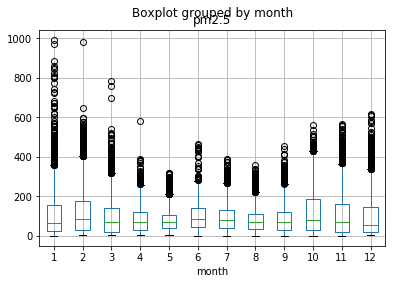

In [38]:
ax = beijing.boxplot("pm2.5",by="month")

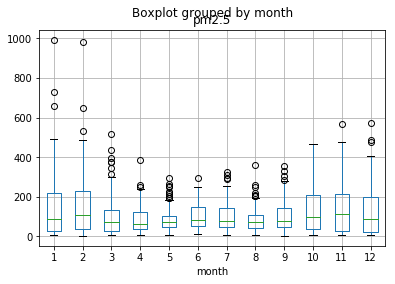

In [212]:
ax = beijing.loc[beijing.hour==1].boxplot("pm2.5",by="month")

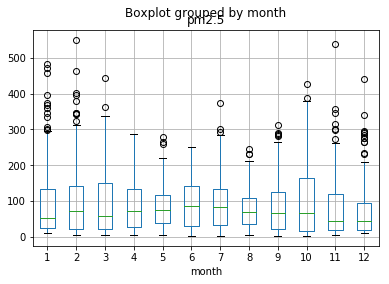

In [82]:
ax = beijing.loc[beijing.hour==12].boxplot("pm2.5",by="month")

In [126]:
grouped = beijing.groupby(["hour","month"])["pm2.5"].mean().unstack()
grouped.style.format("{:.1f}").highlight_max(axis=1,color="royalblue").\
set_caption("Hourly Average by Month")

month,1,2,3,4,5,6,7,8,9,10,11,12
hour,,,,,,,,,,,,
0,142.8,148.5,109.5,84.8,81.7,98.6,96.9,84.2,97.7,144.5,139.9,129.4
1,147.3,155.0,103.5,84.6,82.9,101.3,97.4,84.7,99.1,139.8,140.1,128.7
2,138.3,141.9,97.7,85.1,82.8,102.6,99.3,85.8,98.3,135.4,135.1,121.9
3,128.0,145.0,96.7,85.3,83.6,103.9,102.0,85.7,93.3,129.6,127.7,115.8
4,118.4,136.4,100.3,85.7,83.9,100.8,101.3,85.1,89.9,126.5,116.0,104.0
5,108.3,126.8,94.5,85.9,86.9,103.6,103.4,84.4,84.8,118.9,105.6,96.1
6,102.4,121.2,93.5,87.2,87.8,103.8,102.6,85.6,82.5,107.9,96.7,90.6
7,95.9,118.5,96.2,91.6,88.4,105.3,103.8,86.0,84.8,104.6,93.1,83.6
8,93.6,117.6,98.7,92.7,91.0,104.0,103.7,84.9,85.5,104.9,91.1,82.7


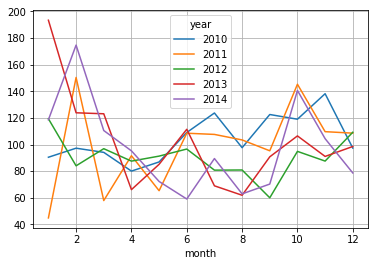

In [58]:
beijing.groupby(["hour","month"])["pm2.5"].mean().unstack()

#### Effect of Wind Direction is Important
* CV (Calm and Variable) is worst in cooler months
* SE is worst in warmer months

In [264]:
grouped = beijing.groupby(["month","cbwd"])["No"].count().unstack()
grouped["Total Days"] = grouped.sum(1)
grouped[['NE','NW','SE','cv']].apply(lambda x: x/x.sum(),1).style.format("{:.1%}").\
highlight_max(axis=1).set_caption("Prevailing Winds by Month")

cbwd,NE,NW,SE,cv
month,,,,
1,13.1%,50.8%,17.5%,18.5%
2,15.3%,33.7%,30.5%,20.4%
3,10.9%,34.3%,36.7%,18.1%
4,10.7%,29.6%,44.2%,15.6%
5,7.8%,25.8%,47.5%,18.9%
6,9.7%,14.7%,51.5%,24.1%
7,10.1%,18.0%,51.9%,20.1%
8,11.2%,19.9%,46.8%,22.0%
9,13.9%,25.0%,36.6%,24.5%


In [265]:
grouped = beijing.groupby(["month","cbwd"])["pm2.5"].median().unstack()
grouped.style.format("{:.1f}").highlight_max(axis=1,color="royalblue").\
set_caption("Max Median Polution by Month and Wind Direction")

cbwd,NE,NW,SE,cv
month,,,,
1,40.0,31.0,120.5,125.5
2,36.0,41.0,103.0,133.5
3,37.5,23.0,91.0,113.5
4,53.0,23.0,91.0,84.0
5,65.0,38.0,80.0,78.0
6,58.0,39.0,98.0,88.0
7,59.5,35.0,93.0,82.5
8,66.0,36.0,76.0,79.0
9,52.0,31.5,88.0,85.0


*Interpretation:* No Wind associated with highest polution (happens during cold months). NW winds best for air quality.

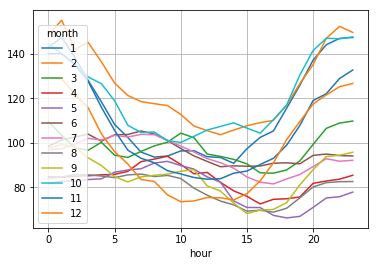

In [118]:
ax = grouped.plot(grid=True)

In [240]:
grouped = beijing.groupby(["year","cbwd"])["pm2.5"].median().unstack()
grouped.style.format("{:.1f}").highlight_max(axis=1,color="royalblue").\
set_caption("Max Median by Year and Wind Direction")

cbwd,NE,NW,SE,cv
year,,,,
2010,59.0,39.0,97.0,111.0
2011,60.0,28.0,96.0,105.0
2012,48.0,24.0,93.0,90.0
2013,51.0,33.0,85.0,98.0
2014,59.0,30.0,83.0,91.0


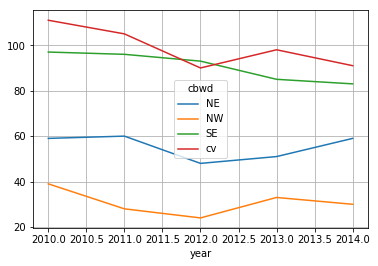

In [241]:
ax = grouped.plot(grid=True)

In [244]:
grouped = beijing.loc[beijing.month==12].groupby(["year","cbwd"])["pm2.5"].median().unstack()
grouped.style.format("{:.1f}").highlight_max(axis=1,color="royalblue").\
set_caption("Max Median by Year and Wind Direction in December")

cbwd,NE,NW,SE,cv
year,,,,
2010,27.0,23.0,74.0,208.5
2011,76.5,24.0,101.0,130.0
2012,93.0,22.0,125.0,118.5
2013,39.0,33.0,72.0,98.0
2014,72.5,15.0,72.0,119.0


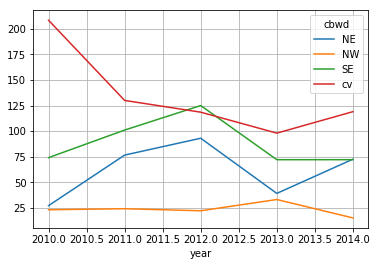

In [245]:
ax = grouped.plot(grid=True)

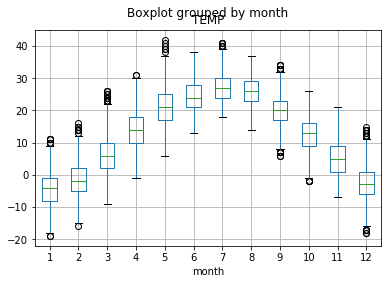

In [129]:
ax = beijing.boxplot(column="TEMP",by="month")

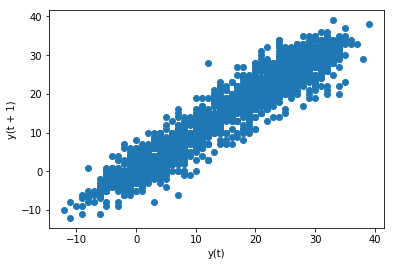

In [196]:
ax = pd.plotting.lag_plot(beijing.loc[beijing.hour==12]["TEMP"])

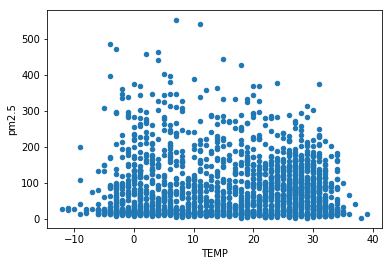

In [133]:
ax = beijing.loc[beijing.hour==12].plot.scatter(x="TEMP",y="pm2.5",grid=True)

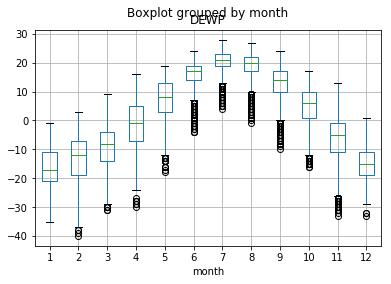

In [145]:
ax = beijing.boxplot(column="DEWP",by="month")

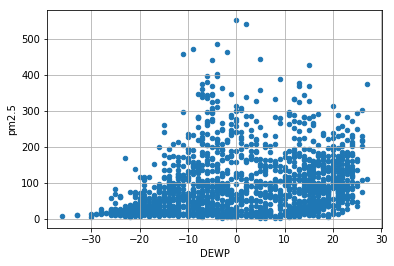

In [146]:
ax = beijing.loc[beijing.hour==12].plot.scatter(x="DEWP",y="pm2.5",grid=True)

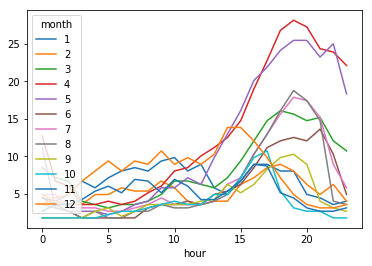

In [157]:
ax = beijing.groupby(["hour","month"]).Iws.median().unstack().plot()

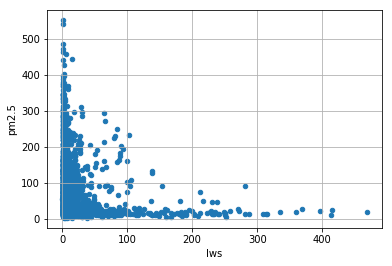

In [143]:
ax = beijing.loc[beijing.hour==12].plot.scatter(x="Iws",y="pm2.5",grid=True)

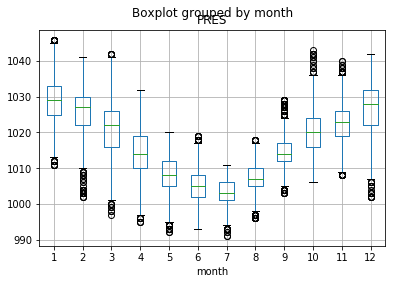

In [158]:
ax = beijing.boxplot(column="PRES",by="month")

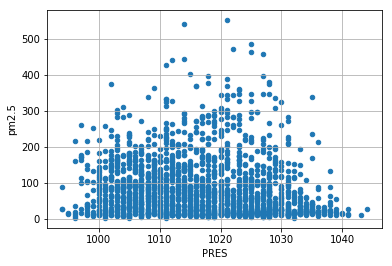

In [144]:
ax = beijing.loc[beijing.hour==12].plot.scatter(x="PRES",y="pm2.5",grid=True)

### Dependent Variable

In [213]:
beijing["pm2.5"].describe()

count    41757.000000
mean        98.613215
std         92.050387
min          0.000000
25%         29.000000
50%         72.000000
75%        137.000000
max        994.000000
Name: pm2.5, dtype: float64

In [225]:
N = len(beijing)
miss_y = N-beijing["pm2.5"].count()
print("Missing Count {} out of {}: Ratio {:.2%}".format(miss_y,N,miss_y/N))

Missing Count 2067 out of 43824: Ratio 4.72%


#### Analysis of Missing Dependent Variable

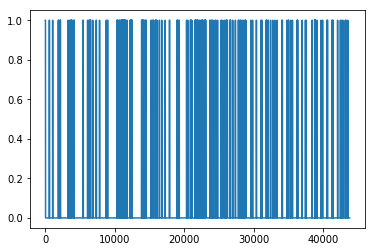

In [178]:
beijing["miss_pm2.5"] = beijing["pm2.5"].isnull().astype("int")
ax = beijing["miss_pm2.5"].plot()

In [184]:
grouped = beijing.groupby(["year","month"])["miss_pm2.5"].mean().unstack()
grouped.style.format("{:.2f}").highlight_max(axis=1)

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2010,0.12,0.00,0.05,0.00,0.01,0.22,0.00,0.09,0.35,0.00,0.08,0.00
2011,0.10,0.00,0.16,0.26,0.04,0.01,0.00,0.23,0.00,0.17,0.01,0.00
2012,0.10,0.01,0.01,0.00,0.07,0.02,0.08,0.16,0.01,0.01,0.03,0.17
2013,0.01,0.00,0.01,0.01,0.02,0.00,0.01,0.01,0.00,0.01,0.00,0.03
2014,0.01,0.00,0.00,0.00,0.00,0.02,0.01,0.01,0.01,0.00,0.02,0.04


In [185]:
grouped = beijing.groupby(["day","month"])["miss_pm2.5"].mean().unstack()
grouped.style.format("{:.2f}").highlight_max(axis=1)

month,1,2,3,4,5,6,7,8,9,10,11,12
day,,,,,,,,,,,,
1,0.40,0.00,0.00,0.03,0.00,0.03,0.02,0.20,0.00,0.00,0.14,0.00
2,0.00,0.00,0.00,0.02,0.00,0.14,0.01,0.20,0.00,0.00,0.20,0.00
3,0.00,0.00,0.02,0.03,0.00,0.00,0.01,0.11,0.00,0.10,0.12,0.00
4,0.00,0.00,0.01,0.00,0.01,0.14,0.01,0.01,0.00,0.20,0.00,0.00
5,0.00,0.00,0.00,0.00,0.00,0.21,0.00,0.00,0.00,0.20,0.00,0.02
6,0.00,0.00,0.04,0.12,0.00,0.23,0.00,0.18,0.00,0.20,0.01,0.00
7,0.00,0.00,0.03,0.20,0.01,0.11,0.00,0.19,0.00,0.13,0.00,0.00
8,0.07,0.00,0.01,0.17,0.00,0.17,0.00,0.05,0.00,0.03,0.00,0.05
9,0.20,0.00,0.01,0.08,0.00,0.23,0.00,0.02,0.00,0.00,0.00,0.10


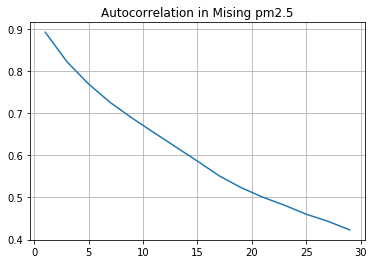

In [211]:
idx = range(1,30,2)
ax = pd.Series([beijing["miss_pm2.5"].autocorr(i) for i in idx],index = idx).\
plot(grid=True,title="Autocorrelation in Missing pm2.5")